# **Лабораторна робота 6**
## *Застосування numpy*

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### **Завдання 1**

#### 1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів.

$$ Y = \beta_0 + \beta_1 X + \epsilon $$ 
- Y - залежна змінна (яку ми намагаємось передбачити).
- X - незалежна змінна (на основі якої ми робимо прогноз).
- β0 - зсув (intercept), константа або початкова точка.
- β1 - коефіцієнт нахилу (slope).
- ε – шум (випадкова похибка), яка враховує невипадкову складову і рандомізовану природу даних.

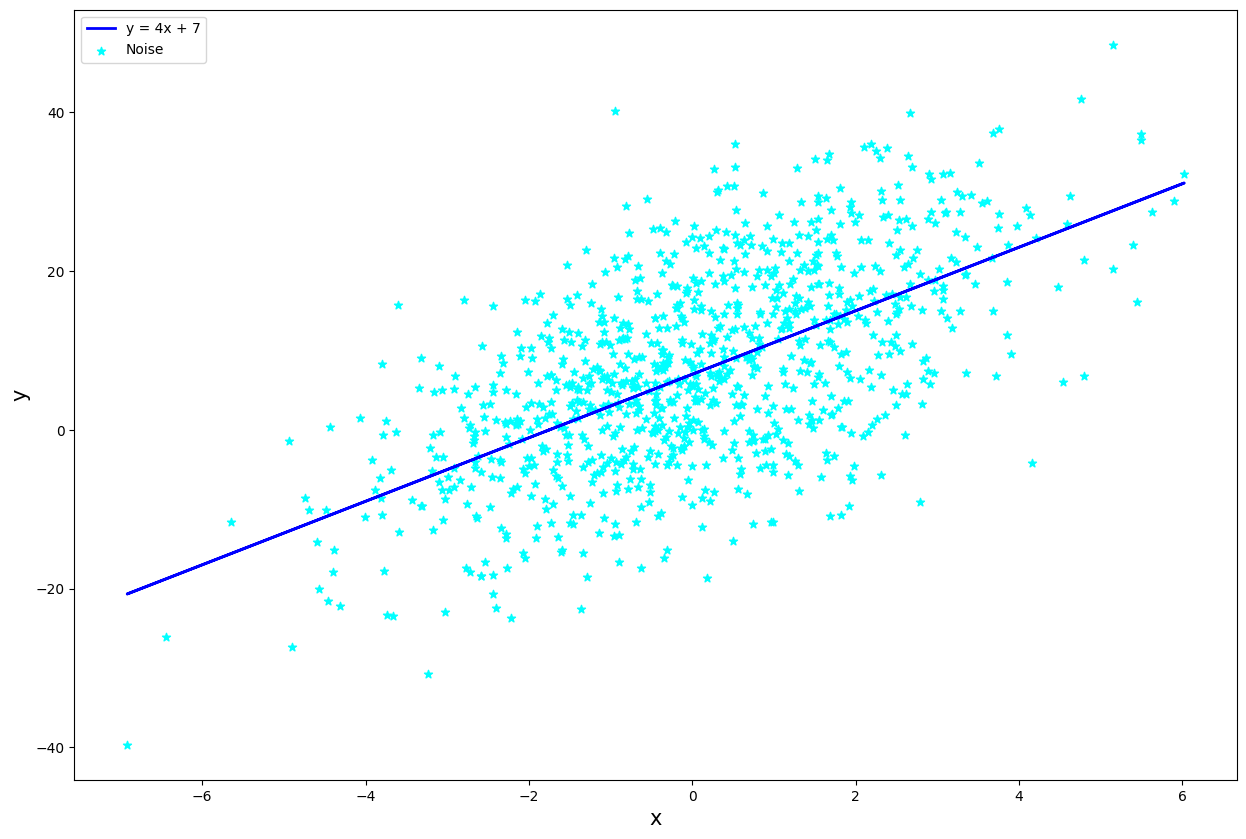

In [2]:
def y(x, k, b):
    return k*x + b

k = 4
b = 7
x = np.random.normal(0,2,1000)
noise = np.random.normal(0,10,1000)

y = y(x,k,b)

plt.figure(figsize=(15,10))
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.plot(x, y, label=f'y = {k}x + {b}', color='blue', lw=2)
plt.scatter(x, y+noise, label='Noise', marker='*', color='cyan')
plt.legend()
init_plot = plt.gcf()

#### 2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.
$$ \beta_1 = \frac{\sum_{i}(X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i}(X_i - \bar{X})^2} $$
$$ \beta_0 = \bar{Y} - \beta_1\bar{X} $$

In [9]:
def ols(x,y):
    y_m = y.mean()
    x_m = x.mean()

    b1 = np.sum((y-y_m)*(x-x_m)) / np.sum((x-x_m)**2)
    b0 = y_m- b1*x_m
    return(b1,b0)

b1, b0 = ols(x, y+noise)

#### 3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [4]:
b1_np, b0_np = np.polyfit(x, y+noise, 1)

print(f'Initial:\n\tk = {k}\n\tb = {b}')
print(f'My func:\n\tb1 = {b1}\n\tb0 = {b0}\nNp.polyfit:\n\tb1 = {b1_np}\n\tb0 = {b0_np}')
print(f'Error:\n\t|k-b1| = {round(abs(k-b1), 4)}\n\t|b-b0| = {round(abs(b-b0), 4)}')

Initial:
	k = 4
	b = 7
My func:
	b1 = 3.916825193442978
	b0 = 7.4692744574923315
Np.polyfit:
	b1 = 3.916825193442978
	b0 = 7.4692744574923395
Error:
	|k-b1| = 0.0832
	|b-b0| = 0.4693


#### 4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.
Після знаходження цих параметрів ми можемо побудувати регресійну лінію:
$$Y = \beta_0 + \beta_1 X $$ 

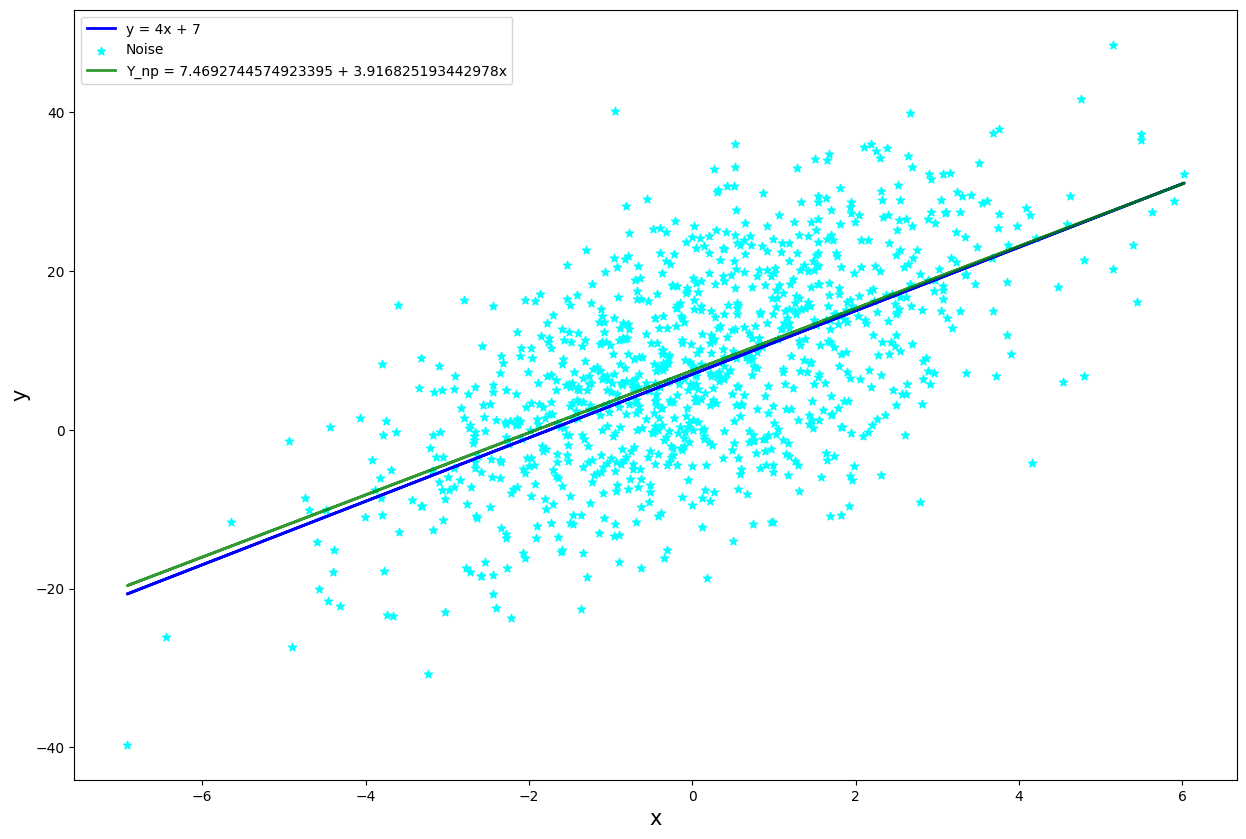

In [5]:
def regression_line(x, b0, b1):
    return b0 + b1 * x

Y = regression_line(x, b0, b1) 
Y_np = regression_line(x, b0_np, b1_np) 

plt.figure(init_plot)
plt.plot(x, Y_np, label=f'Y_np = {b0_np} + {b1_np}x', color='green', lw=2, alpha=0.8)
plt.legend()
plt.show()

### **Завдання 2**

#### 1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

Алгоритм виглядає наступним чином:
1. Ініціалізуємо початкові значення $\beta_{0}^{0}$ та $\beta_{1}^{0}$, визначаємо *learning_rate*, а також кількість ітерацій (або умову зупинки замість цього, наприклад, мінімально допустиму похибку прогнозу).
3. Обчислюємо поточні прогнози для кожного рядка: 

$$
\hat{y}_i = \beta_0^i + \beta_1^i x_i
$$

3. Обчислюємо часткові похідні по кожному з параметрів:

$$
\frac{\partial L}{\partial \beta_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

$$
\frac{\partial L}{\partial \beta_1} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i)
$$

4. Оновлюємо параметри, використовуючи знайдені часткові похідні та коефіцієнт навчання:

$$
\beta_{0}^{(i+1)} = \beta_{0}^{(i)} - \alpha \frac{\partial L}{\partial \beta_{0}}
$$

$$
\beta_{1}^{(i+1)} = \beta_{1}^{(i)} - \alpha \frac{\partial L}{\partial \beta_{1}}
$$

5. Повторюємо кроки 2-4 визначену кількість ітерацій (або до умови зупинки).


In [6]:
def gradient_descent(x, Y, b0, b1, learning_rate, n_iter):
    n = x.shape[0]
    for i in range(n_iter): 
        Y_pred = b0 + b1*x  
        D_b0 = (-2/n) * sum(Y - Y_pred)  # Derivative b0
        D_b1 = (-2/n) * sum(x * (Y - Y_pred))  # Derivative b1
        b0 -= learning_rate * D_b0  # Update b0
        b1 -= learning_rate * D_b1  # Update b1
    return(b0, b1, b0+b1*x)

b0_g, b1_g, Y_g = gradient_descent(x, Y, 0, 0, 0.01, 1000)
print(f'Initial:\n\tk = {k}\n\tb = {b}')
print(f'Gradient descent:\n\tb1 = {b1_g}\n\tb0 = {b0_g}')
print(f'Error:\n\t|k-b1| = {round(abs(k-b1_g), 4)}\n\t|b-b0| = {round(abs(b-b0_g), 4)}')

Initial:
	k = 4
	b = 7
Gradient descent:
	b1 = 3.9168251937617
	b0 = 7.469274444660812
Error:
	|k-b1| = 0.0832
	|b-b0| = 0.4693


#### 2. Додайте отриману лінію регресії на загальний графік

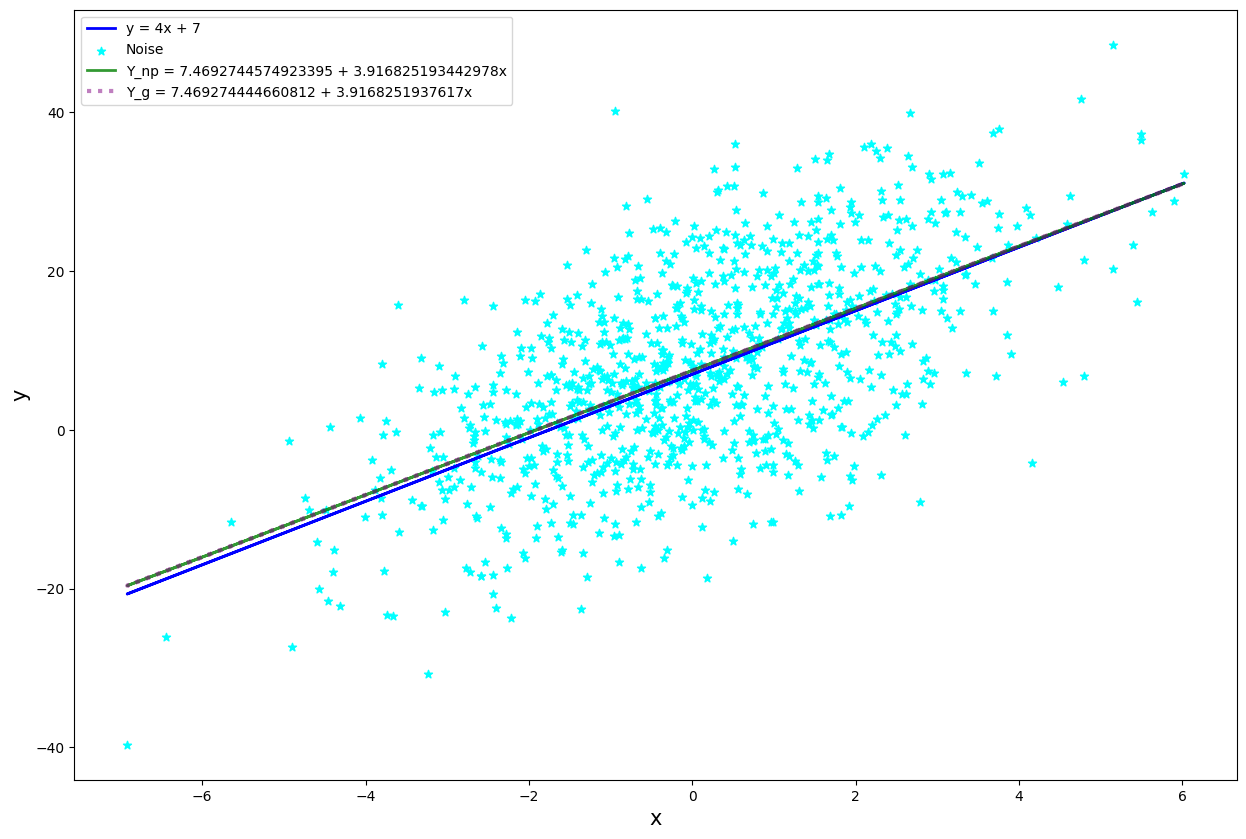

In [7]:
plt.figure(init_plot)
plt.plot(x, Y_g, label=f'Y_g = {b0_g} + {b1_g}x', color='purple', linestyle='dotted', lw=3, alpha=0.5)
plt.legend()
plt.show()

#### 3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

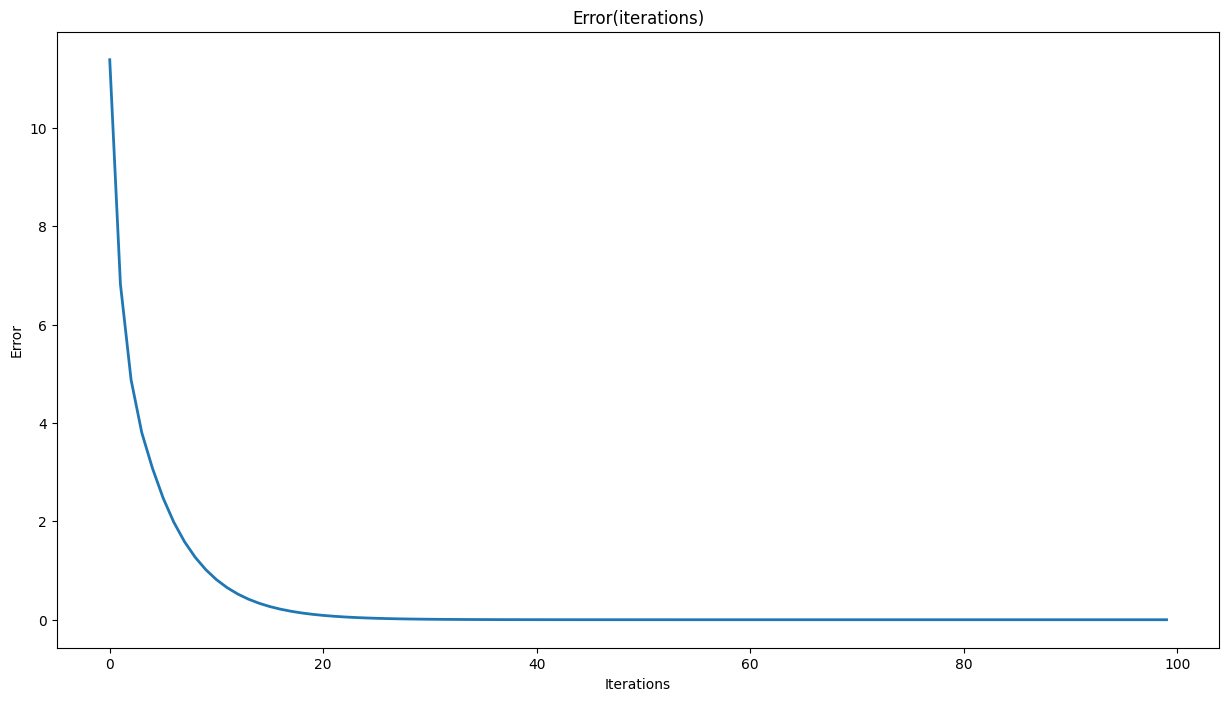

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_iter(max_i, b0, b1):
    iters = np.array([])
    err = np.array([])
    for i in range(max_i):
        b0_, b1_, Y_ = gradient_descent(x, Y, 0, 0, 0.1, i)
        err = np.append(err, abs(b0 - b0_) + abs(b1 - b1_))
        iters = np.append(iters, i)
    plt.figure(figsize=(15,8))
    plt.plot(iters, err, lw=2)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title('Error(iterations)')
    plt.show()

plot_iter(100, b0, b1)